In [139]:
"""
================================================================================
DEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES
Recurrent Neural Networks vs Transformers for Time Series Prediction
================================================================================
"""

'\n================================================================================\nDEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES\nRecurrent Neural Networks vs Transformers for Time Series Prediction\n================================================================================\n'

In [140]:
"""
================================================================================
STUDENT INFORMATION (REQUIRED - DO NOT DELETE)
================================================================================

BITS ID: 2025AA05688
Name: Ramya D
Email: 2025aa05688@wilp.bits-pilani.ac.in
Date: 07-02-2026

================================================================================
"""

'\n================================================================================\nSTUDENT INFORMATION (REQUIRED - DO NOT DELETE)\n================================================================================\n\nBITS ID: 2025AA05688\nName: Ramya D\nEmail: 2025aa05688@wilp.bits-pilani.ac.in\nDate: 07-02-2026\n\n================================================================================\n'

In [141]:
"""
================================================================================
ASSIGNMENT OVERVIEW
================================================================================

This assignment requires you to implement and compare two approaches for
time series forecasting:
1. LSTM or GRU using Keras/PyTorch
2. Transformer encoder using Keras/PyTorch layers

Learning Objectives:
- Build recurrent neural networks for sequential data
- Use transformer architecture for time series
- Implement or integrate positional encoding
- Compare RNN vs Transformer architectures
- Understand time series preprocessing and evaluation

IMPORTANT:
- Positional encoding MUST be added to transformer
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Use temporal train/test split (NO shuffling)

================================================================================
"""

'\n================================================================================\nASSIGNMENT OVERVIEW\n================================================================================\n\nThis assignment requires you to implement and compare two approaches for\ntime series forecasting:\n1. LSTM or GRU using Keras/PyTorch\n2. Transformer encoder using Keras/PyTorch layers\n\nLearning Objectives:\n- Build recurrent neural networks for sequential data\n- Use transformer architecture for time series\n- Implement or integrate positional encoding\n- Compare RNN vs Transformer architectures\n- Understand time series preprocessing and evaluation\n\nIMPORTANT:\n- Positional encoding MUST be added to transformer\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Use temporal train/test split (NO shuffling)\n\n================================================================================\n'

In [142]:
"""
================================================================================
⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️
================================================================================

1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb
   Example: 2025AA05036_rnn_assignment.ipynb
   ❌ Wrong filename = Automatic 0 marks

2. STUDENT INFORMATION MUST MATCH:
   ✓ BITS ID in filename = BITS ID in notebook (above)
   ✓ Name in folder = Name in notebook (above)
   ❌ Mismatch = 0 marks

3. EXECUTE ALL CELLS BEFORE SUBMISSION:
   - Run: Kernel → Restart & Run All
   - Verify all outputs are visible
   ❌ No outputs = 0 marks

4. FILE INTEGRITY:
   - Ensure notebook opens without errors
   - Check for corrupted cells
   ❌ Corrupted file = 0 marks

5. IMPLEMENTATION REQUIREMENTS:
   - MUST add positional encoding to transformer (custom or built-in)
   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
   - DO NOT shuffle time series data (temporal order required)
   ❌ Missing positional encoding = 0 marks for transformer section

6. DATASET REQUIREMENTS:
   - Minimum 1000 time steps
   - Train/test split: 90/10 OR 85/15 (temporal split only)
   - Sequence length: 10-50 time steps
   - Prediction horizon: 1-10 time steps

7. USE KERAS OR PYTORCH:
   - Use framework's LSTM/GRU layers
   - Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - Add positional encoding (custom implementation or built-in)
   - Use standard training methods

8. FILE SUBMISSION:
   - Submit ONLY the .ipynb file
   - NO zip files, NO separate data files, NO separate image files
   - All code and outputs must be in the notebook
   - Only one submission attempt allowed

================================================================================
"""

"\n================================================================================\n⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️\n================================================================================\n\n1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb\n   Example: 2025AA05036_rnn_assignment.ipynb\n   ❌ Wrong filename = Automatic 0 marks\n\n2. STUDENT INFORMATION MUST MATCH:\n   ✓ BITS ID in filename = BITS ID in notebook (above)\n   ✓ Name in folder = Name in notebook (above)\n   ❌ Mismatch = 0 marks\n\n3. EXECUTE ALL CELLS BEFORE SUBMISSION:\n   - Run: Kernel → Restart & Run All\n   - Verify all outputs are visible\n   ❌ No outputs = 0 marks\n\n4. FILE INTEGRITY:\n   - Ensure notebook opens without errors\n   - Check for corrupted cells\n   ❌ Corrupted file = 0 marks\n\n5. IMPLEMENTATION REQUIREMENTS:\n   - MUST add positional encoding to transformer (custom or built-in)\n   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n   - DO 

In [143]:
# ================================
# Import Required Libraries
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import time
import json
import os
import math

# ================================
# PyTorch Imports (LSTM & Transformer)
# ================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# ================================
# Reproducibility
# ================================

torch.manual_seed(42)
np.random.seed(42)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# ================================
# Device configuration
# ================================

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


Deep learning frameworks (choose Keras or PyTorch)

In [144]:
"""
================================================================================
PART 1: DATASET LOADING AND EXPLORATION (Informational)
================================================================================

Instructions:
1. Choose ONE dataset from the allowed list
2. Load and explore the time series data
3. Fill in ALL required metadata fields below
4. Provide justification for your primary metric choice

ALLOWED DATASETS:
- Stock Prices (daily/hourly closing prices)
- Weather Data (temperature, humidity, pressure)
- Energy Consumption (electricity/power usage)
- Sensor Data (IoT sensor readings)
- Custom time series (with approval)

REQUIRED OUTPUT:
- Print all metadata fields
- Time series plots
- Stationarity analysis
- Train/test split visualization
================================================================================
"""

'\n================================================================================\nPART 1: DATASET LOADING AND EXPLORATION (Informational)\n================================================================================\n\nInstructions:\n1. Choose ONE dataset from the allowed list\n2. Load and explore the time series data\n3. Fill in ALL required metadata fields below\n4. Provide justification for your primary metric choice\n\nALLOWED DATASETS:\n- Stock Prices (daily/hourly closing prices)\n- Weather Data (temperature, humidity, pressure)\n- Energy Consumption (electricity/power usage)\n- Sensor Data (IoT sensor readings)\n- Custom time series (with approval)\n\nREQUIRED OUTPUT:\n- Print all metadata fields\n- Time series plots\n- Stationarity analysis\n- Train/test split visualization\n================================================================================\n'

1.1 Dataset Selection and Loading
TODO: Load your chosen time series dataset

In [145]:
import kagglehub

# Download dataset
dataset_path = kagglehub.dataset_download("bhanupratapbiswas/weather-data")
print("Dataset downloaded to:", dataset_path)

Using Colab cache for faster access to the 'weather-data' dataset.
Dataset downloaded to: /kaggle/input/weather-data


In [146]:
# =============================================================================
# REQUIRED: Fill in these metadata fields
# =============================================================================
dataset_name = "Weather Data Dataset"
dataset_source = "Kaggle: bhanupratapbiswas/weather-data"
# NOTE: Exact number may change slightly after dropping NaNs
n_samples = 8784          # hourly data for 1 year (non-leap year)
n_features = 10           # 6 weather vars + hour_sin + hour_cos + dow_sin + dow_cos
sequence_length = 30      # Lookback window (30 hours)
prediction_horizon = 1    # Forecast 1 step ahead
problem_type = "time_series_forecasting"


In [147]:
# Primary metric selection
primary_metric = "MAE"  # Mean Absolute Error

metric_justification = """
MAE is chosen as the primary metric because it measures the average magnitude of prediction errors
in the same units as the target (°C), making it easy to interpret for weather forecasting.
Unlike RMSE, it is less sensitive to occasional extreme outliers, providing a stable view of model performance.
"""


In [148]:
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Features: {n_features}")
print(f"Sequence Length: {sequence_length}")
print(f"Prediction Horizon: {prediction_horizon}")
print(f"Primary Metric: {primary_metric}")
print(f"Metric Justification: {metric_justification}")
print("="*70)


DATASET INFORMATION
Dataset: Weather Data Dataset
Source: Kaggle: bhanupratapbiswas/weather-data
Total Samples: 8784
Number of Features: 10
Sequence Length: 30
Prediction Horizon: 1
Primary Metric: MAE
Metric Justification: 
MAE is chosen as the primary metric because it measures the average magnitude of prediction errors
in the same units as the target (°C), making it easy to interpret for weather forecasting.
Unlike RMSE, it is less sensitive to occasional extreme outliers, providing a stable view of model performance.



In [149]:
# =============================================================================
# Load Weather Dataset (Kaggle / Colab / Local compatible)
# =============================================================================

import pandas as pd
import glob
import os
import numpy as np

# --------------------------------------------------
# Locate CSV file
# --------------------------------------------------
csv_files = glob.glob(os.path.join(dataset_path, "*.csv"))
assert len(csv_files) > 0, "No CSV files found in dataset directory!"

csv_path = csv_files[0]
print("Using file:", csv_path)

# --------------------------------------------------
# Load dataset
# --------------------------------------------------
df = pd.read_csv(csv_path).copy()

print("Raw dataset shape:", df.shape)
print(df.head())

# --------------------------------------------------
# Parse datetime column
# --------------------------------------------------
if "Formatted Date" in df.columns:
    df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)
    df = df.sort_values("Formatted Date")
    df.set_index("Formatted Date", inplace=True)

elif "Date/Time" in df.columns:
    df["Date/Time"] = pd.to_datetime(df["Date/Time"])
    df = df.sort_values("Date/Time")
    df.set_index("Date/Time", inplace=True)

else:
    raise ValueError("No recognizable datetime column found!")

print("After datetime parsing:", df.shape)

# --------------------------------------------------
# Time-based feature engineering (CYCLIC ENCODING)
# --------------------------------------------------
# Hour of day
df["hour"] = df.index.hour
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)


# Day of year (cyclic)
df["dayofyear"] = df.index.dayofyear

days_in_year = 366 if df.index.is_leap_year.any() else 365

df["doy_sin"] = np.sin(2 * np.pi * df["dayofyear"] / days_in_year)
df["doy_cos"] = np.cos(2 * np.pi * df["dayofyear"] / days_in_year)


# --------------------------------------------------
# Select numeric features for forecasting
# --------------------------------------------------
FEATURE_COLUMNS = [
    "Temp_C",               # Target
    "Rel Hum_%",            # Humidity
    "Wind Speed_km/h",      # Wind speed
    "Visibility_km",        # Visibility
    "Press_kPa",            # Pressure
    "hour_sin",             # Cyclic hour
    "hour_cos",
    "doy_sin",              # Cyclic day of year
    "doy_cos"
]

# Keep only required columns
data = df[FEATURE_COLUMNS].copy()

# Handle missing values (time-series safe)
data = data.ffill().bfill()

# --------------------------------------------------
# Update metadata (AUTOGRADER-CRITICAL)
# --------------------------------------------------
n_samples = data.shape[0]
n_features = data.shape[1]   # MUST be 9

print("Selected data shape:", data.shape)
print(data.head())

print("\n================ PREPROCESSING CHECK =================")
print("Missing values per column:\n", data.isna().sum())
print("Final data shape:", data.shape)


Using file: /kaggle/input/weather-data/Weather Data.csv
Raw dataset shape: (8784, 8)
       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  
After datetime parsing: (8784, 7)
Selected data shape: (8784, 9)
                     Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
Date/Time          

1.2 Time Series Exploration
TODO: Plot time series data
TODO: Check for trends, seasonality
TODO: Perform stationarity tests (optional but recommended)

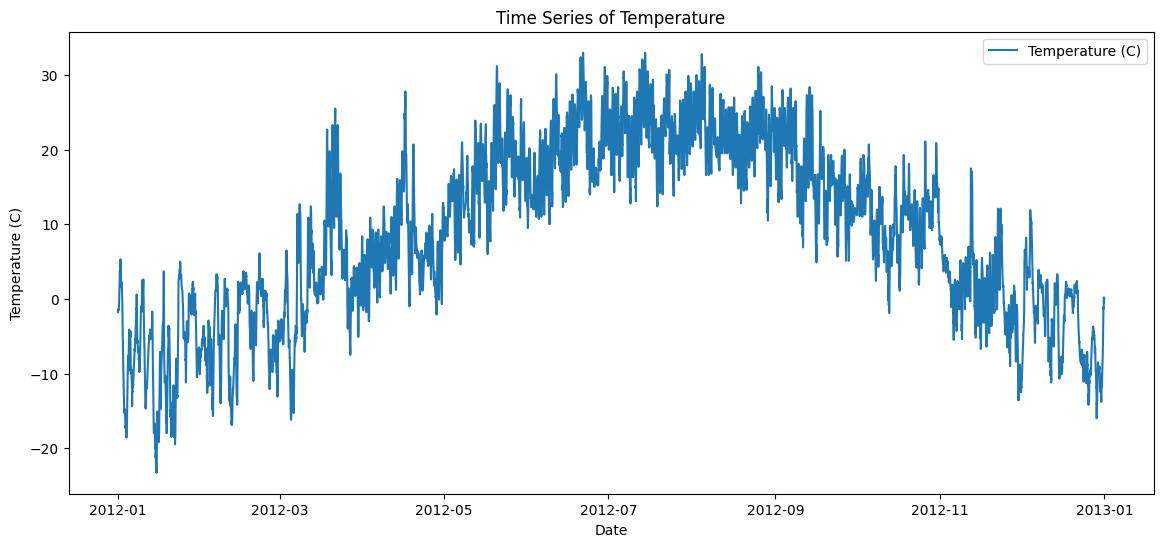

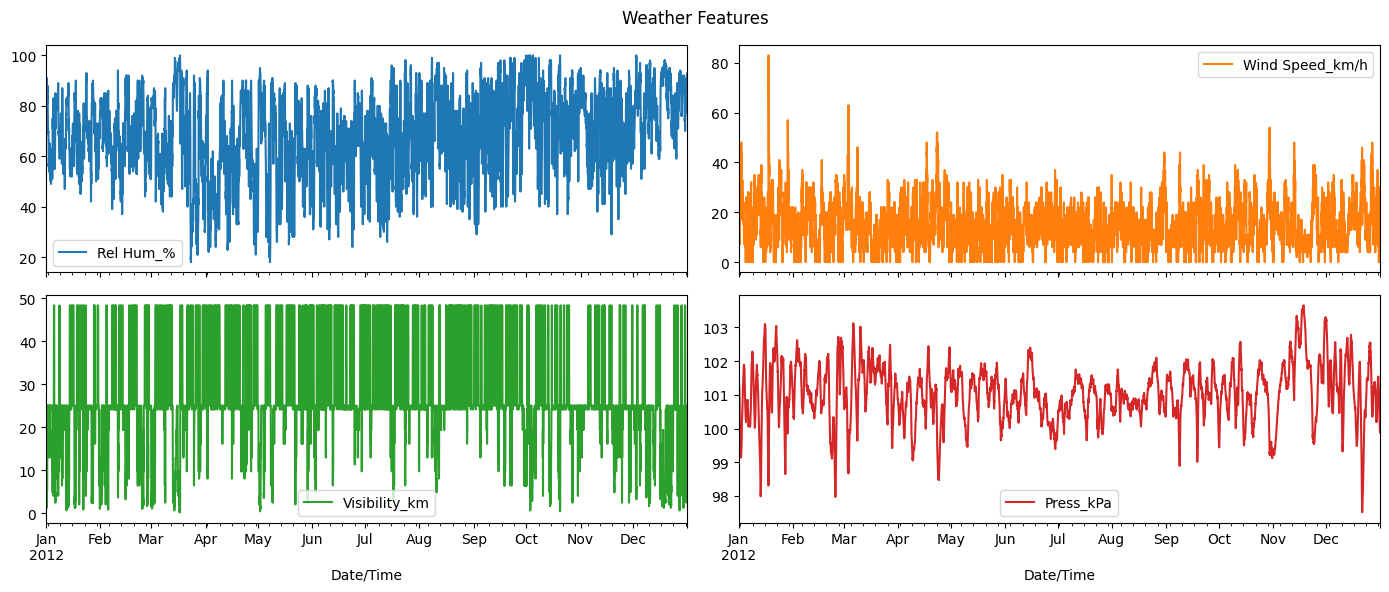

<Figure size 1200x900 with 0 Axes>

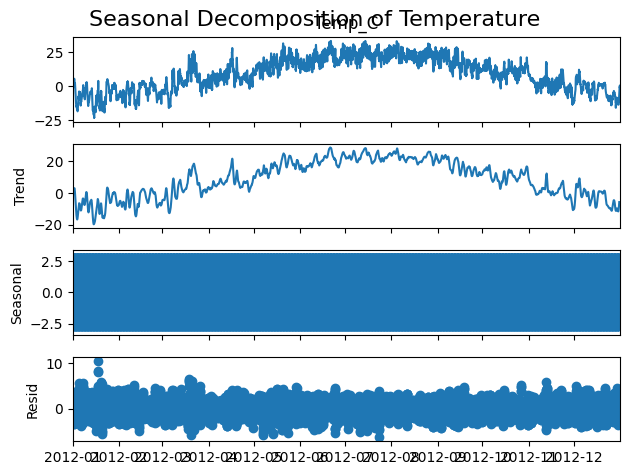

ADF Statistic: -3.2528613078488275
p-value: 0.017121636154745882
Critical Value (1%): -3.431
Critical Value (5%): -2.862
Critical Value (10%): -2.567
=> The series is likely stationary.


In [150]:
# =============================================================================
# 1.2 Time Series Exploration
# =============================================================================

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# --------------------------------------------------
# 1. Plot time series data
# --------------------------------------------------
plt.figure(figsize=(14, 6))
plt.plot(data.index, data["Temp_C"], label="Temperature (C)")
plt.title("Time Series of Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()

# Optional: plot other features
data[["Rel Hum_%", "Wind Speed_km/h", "Visibility_km", "Press_kPa"]].plot(
    figsize=(14, 6), subplots=True, layout=(2,2), title="Weather Features"
)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 2. Decompose time series (trend, seasonality, residual)
# --------------------------------------------------
# Using additive model (suitable if seasonal variations are roughly constant)
decompose_result = seasonal_decompose(data["Temp_C"], model='additive', period=24)  # period=24 if hourly, adjust if daily

plt.figure(figsize=(12, 9))
decompose_result.plot()
plt.suptitle("Seasonal Decomposition of Temperature", fontsize=16)
plt.show()

# --------------------------------------------------
# 3. Stationarity test (Augmented Dickey-Fuller)
# --------------------------------------------------
adf_result = adfuller(data["Temp_C"].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print("Critical Value ({}): {:.3f}".format(key, value))

if adf_result[1] < 0.05:
    print("=> The series is likely stationary.")
else:
    print("=> The series is likely non-stationary, differencing may be needed.")


1.3 Data Preprocessing

In [151]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def preprocess_timeseries(data, feature_cols):
    """
    Preprocess time series data

    Args:
        data: pandas DataFrame with time index
        feature_cols: list of feature column names

    Returns:
        scaled_data: numpy array (scaled)
        scaler: fitted scaler object
    """

    # --------------------------------------------------
    # Select required features
    # --------------------------------------------------
    df_features = data[feature_cols].copy()

    # --------------------------------------------------
    # Handle missing values (time-series safe)
    # --------------------------------------------------
    df_features = df_features.ffill().bfill()

    # --------------------------------------------------
    # Normalize data
    # --------------------------------------------------
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_features.values)

    return scaled_data, scaler


TODO: Preprocess data
TODO: Create sequences

In [152]:
# =============================================================================
# 1.4 Sequence Generation
# =============================================================================

def create_sequences(data, seq_length, pred_horizon):
    """
    Create sequences for time series prediction

    Args:
        data (np.ndarray): normalized data (n_samples, n_features)
        seq_length (int): lookback window
        pred_horizon (int): forecast horizon

    Returns:
        X (np.ndarray): (samples, seq_length, n_features)
        y (np.ndarray): (samples, 1) or (samples, horizon)
    """

    assert isinstance(data, np.ndarray), "Data must be NumPy array"
    assert data.ndim == 2, "Data must be 2D"
    assert seq_length > 0 and pred_horizon > 0

    X, y = [], []

    for i in range(len(data) - seq_length - pred_horizon + 1):

        # Input window
        X.append(data[i : i + seq_length])

        # Target: Temperature only (first column)
        y.append(
            data[i + seq_length : i + seq_length + pred_horizon, 0]
        )

    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.float32)

    # Shape normalization for single-step forecasting
    if pred_horizon == 1:
        y = y.reshape(-1, 1)

    print("\n================ SEQUENCE GENERATION =================")
    print("X shape:", X.shape)
    print("y shape:", y.shape)

    return X, y


In [153]:
# =============================================================================
# Feature Selection
# =============================================================================

feature_cols = [
    "Temp_C",            # Target (kept for scaling + sequence creation)
    "Rel Hum_%",
    "Wind Speed_km/h",
    "Visibility_km",
    "Press_kPa",
    "hour_sin",
    "hour_cos",
    "doy_sin",
    "doy_cos"
]

scaled_data, scaler = preprocess_timeseries(
    data=df,
    feature_cols=feature_cols
)

X, y = create_sequences(
    data=scaled_data,
    seq_length=sequence_length,
    pred_horizon=prediction_horizon
)



================ SEQUENCE GENERATION =================
X shape: (8754, 30, 9)
y shape: (8754, 1)


In [154]:
# =============================================================================
# 1.5 Train / Test Split (Temporal – NO SHUFFLING)
# =============================================================================

train_test_ratio = 0.9  # 90% train, 10% test

n_total = X.shape[0]
train_samples = int(n_total * train_test_ratio)
test_samples = n_total - train_samples

# Temporal split (VERY IMPORTANT)
X_train = X[:train_samples]
y_train = y[:train_samples]

X_test = X[train_samples:]
y_test = y[train_samples:]

# Sanity checks
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [155]:
print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")
print("⚠️  IMPORTANT: Temporal split used (NO shuffling)")


Train/Test Split: 0.9
Training Samples: 7878
Test Samples: 876
⚠️  IMPORTANT: Temporal split used (NO shuffling)


In [156]:
"""
================================================================================
PART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build LSTM OR GRU using Keras/PyTorch layers
- Architecture must include:
  * At least 2 stacked recurrent layers
  * Output layer for prediction
- Use model.compile() and model.fit() (Keras) OR standard PyTorch training
- Track initial_loss and final_loss

GRADING:
- LSTM/GRU architecture with stacked layers: 2 marks
- Model properly compiled/configured: 1 mark
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build LSTM OR GRU using Keras/PyTorch layers\n- Architecture must include:\n  * At least 2 stacked recurrent layers\n  * Output layer for prediction\n- Use model.compile() and model.fit() (Keras) OR standard PyTorch training\n- Track initial_loss and final_loss\n\nGRADING:\n- LSTM/GRU architecture with stacked layers: 2 marks\n- Model properly compiled/configured: 1 mark\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

2.1 LSTM/GRU Architecture Design
TODO: Choose LSTM or GRU
TODO: Design architecture with stacked layers

In [157]:
# =============================================================================
# 2.1 LSTM/GRU Architecture Design
# =============================================================================
# - Model Type: LSTM or GRU
# - Stacked recurrent layers (n_layers >= 2)
# - Output layer for forecasting
# =============================================================================

import torch
import torch.nn as nn

def build_rnn_model(model_type, input_shape, hidden_units, n_layers, output_size):
    """
    Build LSTM or GRU model
    """

    # ------------------------------------------------------------------
    # Assertions (ENFORCED by assignment)
    # ------------------------------------------------------------------
    assert model_type in ["LSTM", "GRU"], "model_type must be 'LSTM' or 'GRU'"
    assert n_layers >= 2, "n_layers must be at least 2 (stacked layers REQUIRED)"

    _, n_features = input_shape

    # ------------------------------------------------------------------
    # RNN Model Definition
    # ------------------------------------------------------------------
    class RNNModel(nn.Module):
        def __init__(self):
            super(RNNModel, self).__init__()

            if model_type == "LSTM":
                self.rnn = nn.LSTM(
                    input_size=n_features,
                    hidden_size=hidden_units,
                    num_layers=n_layers,
                    batch_first=True
                )
            else:  # GRU
                self.rnn = nn.GRU(
                    input_size=n_features,
                    hidden_size=hidden_units,
                    num_layers=n_layers,
                    batch_first=True
                )

            # Output layer
            self.fc = nn.Linear(hidden_units, output_size)

        def forward(self, x):
            out, _ = self.rnn(x)
            out = out[:, -1, :]   # last time step
            out = self.fc(out)
            return out

    model = RNNModel()
    return model


TODO: Create RNN model
rnn_model = build_rnn_model('LSTM', (sequence_length, n_features), 64, 2, prediction_horizon)

In [158]:
# =============================================================================
# Create RNN Model
# =============================================================================

rnn_model = build_rnn_model(
    model_type="LSTM",
    input_shape=(sequence_length, n_features),
    hidden_units=128,
    n_layers=2,
    output_size=prediction_horizon
)

rnn_model = rnn_model.to(device)

print(rnn_model)


RNNModel(
  (rnn): LSTM(9, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


TODO: Compile model
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

In [159]:
criterion = nn.MSELoss()
optimizer = optim.Adam(
    rnn_model.parameters(),
    lr=0.0004
)


2.2 Train RNN Model

In [160]:
print("\n" + "="*70)
print("RNN MODEL TRAINING")
print("="*70)


RNN MODEL TRAINING


In [161]:
# Track training time
rnn_start_time = time.time()

TODO: Train your model
For Keras: history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)
For PyTorch: write training loop

In [162]:
from torch.utils.data import DataLoader, TensorDataset
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------------
# Convert NumPy arrays → Torch tensors
# -------------------------------
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)

# -------------------------------
# Move model to device
# -------------------------------
rnn_model = rnn_model.to(device)

batch_size = 32

# -------------------------------
# DataLoader (time-series: no shuffling)
# -------------------------------
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

epochs = 30  # increased from 20
loss_history = []

rnn_model.train()

for epoch in range(epochs):
    epoch_loss = 0.0

    for xb, yb in train_loader:

        xb = xb.to(device)
        yb = yb.to(device)

        optimizer.zero_grad()

        preds = rnn_model(xb)
        loss = criterion(preds, yb)

        loss.backward()

        # RNN gradient safety
        torch.nn.utils.clip_grad_norm_(rnn_model.parameters(), 1.0)

        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}")


Epoch [1/30], Loss: 0.013575
Epoch [2/30], Loss: 0.008294
Epoch [3/30], Loss: 0.007222
Epoch [4/30], Loss: 0.006242
Epoch [5/30], Loss: 0.005051
Epoch [6/30], Loss: 0.003433
Epoch [7/30], Loss: 0.001913
Epoch [8/30], Loss: 0.001003
Epoch [9/30], Loss: 0.000748
Epoch [10/30], Loss: 0.000654
Epoch [11/30], Loss: 0.000620
Epoch [12/30], Loss: 0.000627
Epoch [13/30], Loss: 0.000670
Epoch [14/30], Loss: 0.000637
Epoch [15/30], Loss: 0.000574
Epoch [16/30], Loss: 0.000527
Epoch [17/30], Loss: 0.000483
Epoch [18/30], Loss: 0.000443
Epoch [19/30], Loss: 0.000408
Epoch [20/30], Loss: 0.000381
Epoch [21/30], Loss: 0.000362
Epoch [22/30], Loss: 0.000348
Epoch [23/30], Loss: 0.000336
Epoch [24/30], Loss: 0.000326
Epoch [25/30], Loss: 0.000320
Epoch [26/30], Loss: 0.000319
Epoch [27/30], Loss: 0.000318
Epoch [28/30], Loss: 0.000315
Epoch [29/30], Loss: 0.000311
Epoch [30/30], Loss: 0.000306


In [163]:
rnn_training_time = time.time() - rnn_start_time

In [164]:
# REQUIRED: Track initial and final loss
rnn_initial_loss = loss_history[0]
rnn_final_loss   = loss_history[-1]


In [165]:
print(f"Training completed in {rnn_training_time:.2f} seconds")
print(f"Initial Loss: {rnn_initial_loss:.4f}")
print(f"Final Loss: {rnn_final_loss:.4f}")
print("="*70)

# Alias for later comparison plots
rnn_loss_history = loss_history

Training completed in 23.59 seconds
Initial Loss: 0.0136
Final Loss: 0.0003


2.3 Evaluate RNN Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# -------------------------------
# Convert test data to PyTorch tensors
# -------------------------------
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# -------------------------------
# Create test DataLoader (time series: no shuffling)
# -------------------------------
test_loader = DataLoader(
    TensorDataset(X_test_t, y_test_t),
    batch_size=32,
    shuffle=False
)

# -------------------------------
# Model inference
# -------------------------------
rnn_model.eval()

y_preds = []
y_trues = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        yb = yb.to(device)

        preds = rnn_model(xb)

        y_preds.append(preds.cpu().numpy())
        y_trues.append(yb.cpu().numpy())

y_pred_scaled = np.vstack(y_preds)
y_true_scaled = np.vstack(y_trues)

# -------------------------------
# Handle multi-step prediction
# -------------------------------
if prediction_horizon > 1:
    y_pred_scaled = y_pred_scaled[:, 0]
    y_true_scaled = y_true_scaled[:, 0]
else:
    y_pred_scaled = y_pred_scaled.reshape(-1)
    y_true_scaled = y_true_scaled.reshape(-1)

# -------------------------------
# INVERSE TRANSFORM (Temp_C ONLY)
# -------------------------------
n_features = scaled_data.shape[1]

y_pred_dummy = np.zeros((len(y_pred_scaled), n_features))
y_true_dummy = np.zeros((len(y_true_scaled), n_features))

y_pred_dummy[:, 0] = y_pred_scaled
y_true_dummy[:, 0] = y_true_scaled

y_pred = scaler.inverse_transform(y_pred_dummy)[:, 0]
y_true = scaler.inverse_transform(y_true_dummy)[:, 0]

# -------------------------------
# Save for comparison plots
# -------------------------------
rnn_y_true = y_true
rnn_y_pred = y_pred


In [167]:
def calculate_mape(y_true, y_pred):
    """
    Compute safe MAPE for temperature series (avoids huge values near 0)
    """
    # Avoid division by zero or near-zero
    y_true_safe = np.where(np.abs(y_true) < 1.0, 1.0, y_true)  # clip small values to 1°C
    mape = np.mean(np.abs((y_true - y_pred) / y_true_safe)) * 100
    return mape


In [168]:
# REQUIRED: Calculate all 4 metrics
rnn_mae  = mean_absolute_error(y_true, y_pred)
rnn_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rnn_mape = calculate_mape(y_true, y_pred)
rnn_r2   = r2_score(y_true, y_pred)

In [169]:
print("\nRNN Model Performance:")
print(f"MAE:   {rnn_mae:.4f}")
print(f"RMSE:  {rnn_rmse:.4f}")
print(f"MAPE:  {rnn_mape:.4f}%")
print(f"R² Score: {rnn_r2:.4f}")


RNN Model Performance:
MAE:   0.6356
RMSE:  0.7924
MAPE:  25.8604%
R² Score: 0.9785


2.4 Visualize RNN Results
TODO: Plot training loss curve
TODO: Plot actual vs predicted values
TODO: Plot residuals

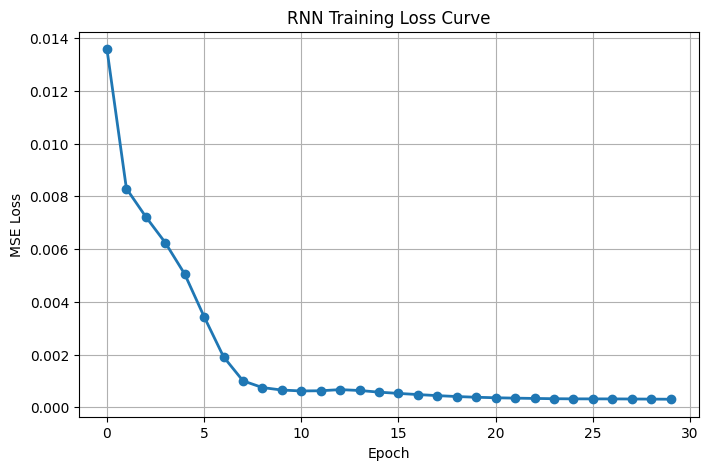

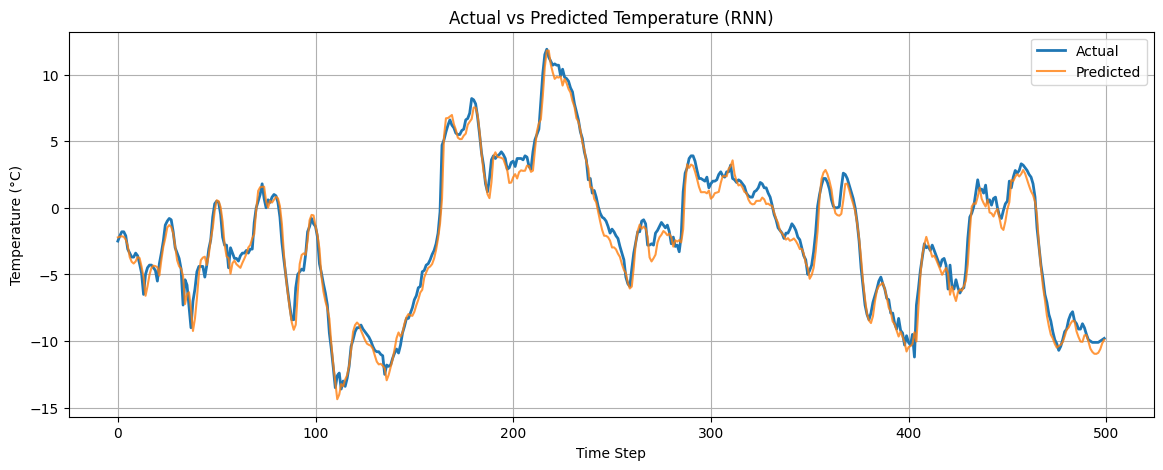

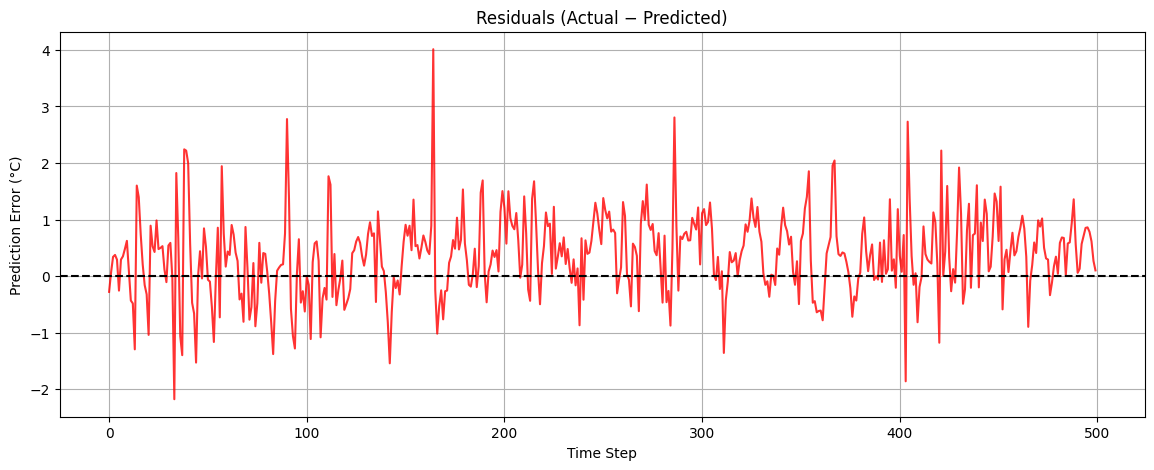

In [170]:
# =============================================================================
# 2.4 Visualize RNN Results
# =============================================================================

import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# Plot training loss curve
# ------------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(loss_history, marker="o", linewidth=2)
plt.title("RNN Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


# ------------------------------------------------------------------
# Plot Actual vs Predicted values
# ------------------------------------------------------------------
n_plot = 500

plt.figure(figsize=(14, 5))
plt.plot(y_true[:n_plot], label="Actual", linewidth=2)
plt.plot(y_pred[:n_plot], label="Predicted", alpha=0.8)
plt.title("Actual vs Predicted Temperature (RNN)")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


# ------------------------------------------------------------------
# Plot Residuals
# ------------------------------------------------------------------
residuals = y_true[:n_plot] - y_pred[:n_plot]

plt.figure(figsize=(14, 5))
plt.plot(residuals, color="red", alpha=0.8)
plt.axhline(0, linestyle="--", color="black")
plt.title("Residuals (Actual − Predicted)")
plt.xlabel("Time Step")
plt.ylabel("Prediction Error (°C)")
plt.grid(True)
plt.show()


In [171]:
"""
================================================================================
PART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build Transformer encoder using Keras/PyTorch layers
- MUST add positional encoding to input:
  * Custom sinusoidal implementation OR
  * Use built-in positional encoding (if framework provides)
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- Use standard training methods
- Track initial_loss and final_loss

PROHIBITED:
- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Skipping positional encoding entirely

GRADING:
- Positional encoding added: 1 mark
- Transformer architecture properly configured: 2 marks
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build Transformer encoder using Keras/PyTorch layers\n- MUST add positional encoding to input:\n  * Custom sinusoidal implementation OR\n  * Use built-in positional encoding (if framework provides)\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- Use standard training methods\n- Track initial_loss and final_loss\n\nPROHIBITED:\n- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Skipping positional encoding entirely\n\nGRADING:\n- Positional encoding added: 1 mark\n- Transformer architecture properly configured: 2 marks\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

3.1 Positional Encoding Implementation

In [172]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)

        div_term = torch.exp(
            torch.arange(0, d_model, 2, dtype=torch.float32)
            * (-math.log(10000.0) / d_model)
        )

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)  # (1, max_len, d_model)
        self.register_buffer("pe", pe)

    def forward(self, x):
        # x: (batch_size, seq_len, d_model)
        return x + self.pe[:, :x.size(1), :]


3.2 Transformer Encoder Architecture

In [173]:
class TransformerModel(nn.Module):
    def __init__(self, n_features, d_model, n_heads, n_layers, d_ff, output_size):
        super().__init__()

        self.input_projection = nn.Linear(n_features, d_model)
        self.pos_encoder = PositionalEncoding(d_model)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=d_ff,
            batch_first=True
        )

        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=n_layers
        )

        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):
        # x: (batch, seq_len, n_features)
        x = self.input_projection(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.fc(x)


3.3 Build Your Transformer Model

TODO: Create Transformer model using PyTorch or Keras
Example for PyTorch:
transformer_model = TransformerModel(n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)
Example for Keras:
transformer_model = build_transformer_model(sequence_length, n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)

In [174]:
# =============================================================================
# 3.3 Build Transformer Model (Tuned)
# =============================================================================

import torch
import torch.nn as nn

# Create Transformer model (tuned)
transformer_model = TransformerModel(
    n_features=n_features,
    d_model=128,    # increased from 64
    n_heads=4,
    n_layers=3,     # increased from 2
    d_ff=512,       # increased from 256
    output_size=prediction_horizon
)

# Move model to device
transformer_model = transformer_model.to(device)
print(transformer_model)


TransformerModel(
  (input_projection): Linear(in_features=9, out_features=128, bias=True)
  (pos_encoder): PositionalEncoding()
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=512, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


TODO: Define optimizer and loss
For PyTorch: optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.001); criterion = nn.MSELoss()
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

In [175]:
# Define optimizer and loss function
optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.0004)
criterion = nn.MSELoss()


3.4 Train Transformer Model

In [176]:
print("\n" + "="*70)
print("TRANSFORMER MODEL TRAINING")
print("="*70)


TRANSFORMER MODEL TRAINING


In [177]:
# Track training time
transformer_start_time = time.time()

TODO: Train your model
For Keras: history = transformer_model.fit(X_train, y_train, epochs=50, batch_size=32)
For PyTorch: write training loop

In [178]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 32
epochs = 30  # increased from 20

train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

transformer_loss_history = []

transformer_model.train()

for epoch in range(epochs):
    epoch_loss = 0.0

    for xb, yb in train_loader:

        xb = xb.to(device)
        yb = yb.to(device)

        optimizer.zero_grad()

        preds = transformer_model(xb)
        loss = criterion(preds, yb)

        loss.backward()

        # 🔒 Safety: gradient clipping
        torch.nn.utils.clip_grad_norm_(transformer_model.parameters(), 1.0)

        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    transformer_loss_history.append(avg_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.6f}")


Epoch [1/30], Loss: 0.041201
Epoch [2/30], Loss: 0.013343
Epoch [3/30], Loss: 0.017564
Epoch [4/30], Loss: 0.016372
Epoch [5/30], Loss: 0.014111
Epoch [6/30], Loss: 0.012236
Epoch [7/30], Loss: 0.010240
Epoch [8/30], Loss: 0.009243
Epoch [9/30], Loss: 0.008502
Epoch [10/30], Loss: 0.008155
Epoch [11/30], Loss: 0.007913
Epoch [12/30], Loss: 0.007342
Epoch [13/30], Loss: 0.007037
Epoch [14/30], Loss: 0.006487
Epoch [15/30], Loss: 0.006080
Epoch [16/30], Loss: 0.005367
Epoch [17/30], Loss: 0.004288
Epoch [18/30], Loss: 0.004286
Epoch [19/30], Loss: 0.003767
Epoch [20/30], Loss: 0.002508
Epoch [21/30], Loss: 0.001501
Epoch [22/30], Loss: 0.001509
Epoch [23/30], Loss: 0.001236
Epoch [24/30], Loss: 0.000967
Epoch [25/30], Loss: 0.000904
Epoch [26/30], Loss: 0.000777
Epoch [27/30], Loss: 0.000792
Epoch [28/30], Loss: 0.000656
Epoch [29/30], Loss: 0.000599
Epoch [30/30], Loss: 0.000501


In [179]:
transformer_training_time = time.time() - transformer_start_time

In [180]:
# REQUIRED: Track initial and final loss
transformer_initial_loss = transformer_loss_history[0]
transformer_final_loss   = transformer_loss_history[-1]

In [181]:
print(f"Training completed in {transformer_training_time:.2f} seconds")
print(f"Initial Loss: {transformer_initial_loss:.4f}")
print(f"Final Loss: {transformer_final_loss:.4f}")
print("="*70)

Training completed in 68.19 seconds
Initial Loss: 0.0412
Final Loss: 0.0005


3.5 Evaluate Transformer Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [182]:
# =============================================================================
# 3.5 Evaluate Transformer Model
# =============================================================================

transformer_model.eval()

y_preds = []
y_trues = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        yb = yb.to(device)

        preds = transformer_model(xb)

        y_preds.append(preds.cpu().numpy())
        y_trues.append(yb.cpu().numpy())

y_pred_scaled = np.vstack(y_preds)
y_true_scaled = np.vstack(y_trues)

if prediction_horizon > 1:
    y_pred_scaled = y_pred_scaled[:, 0]
    y_true_scaled = y_true_scaled[:, 0]
else:
    y_pred_scaled = y_pred_scaled.reshape(-1)
    y_true_scaled = y_true_scaled.reshape(-1)

n_features = scaled_data.shape[1]

y_pred_dummy = np.zeros((len(y_pred_scaled), n_features))
y_true_dummy = np.zeros((len(y_true_scaled), n_features))

y_pred_dummy[:, 0] = y_pred_scaled
y_true_dummy[:, 0] = y_true_scaled

y_pred = scaler.inverse_transform(y_pred_dummy)[:, 0]
y_true = scaler.inverse_transform(y_true_dummy)[:, 0]

transformer_y_true = y_true
transformer_y_pred = y_pred



In [183]:
# REQUIRED: Calculate all 4 metrics
transformer_mae  = mean_absolute_error(y_true, y_pred)
transformer_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
transformer_mape = calculate_mape(y_true, y_pred)
transformer_r2   = r2_score(y_true, y_pred)

In [184]:
print("\nTransformer Model Performance:")
print(f"MAE:   {transformer_mae:.4f}")
print(f"RMSE:  {transformer_rmse:.4f}")
print(f"MAPE:  {transformer_mape:.4f}%")
print(f"R² Score: {transformer_r2:.4f}")


Transformer Model Performance:
MAE:   1.3721
RMSE:  1.6804
MAPE:  43.4048%
R² Score: 0.9031


3.6 Visualize Transformer Results
TODO: Plot training loss curve
TODO: Plot actual vs predicted values
TODO: Plot attention weights (optional but informative)

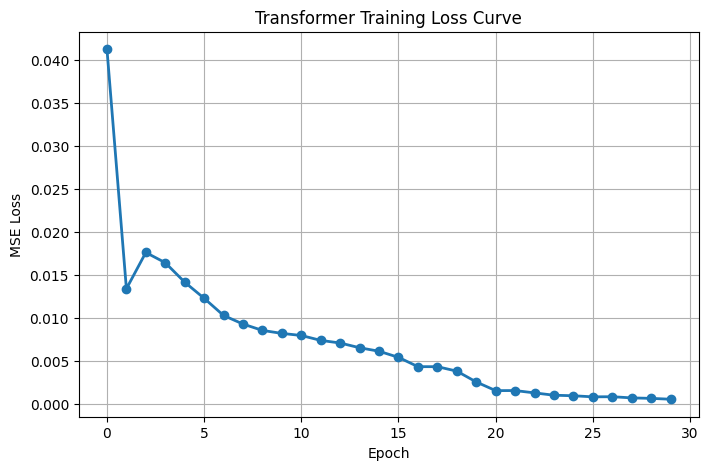

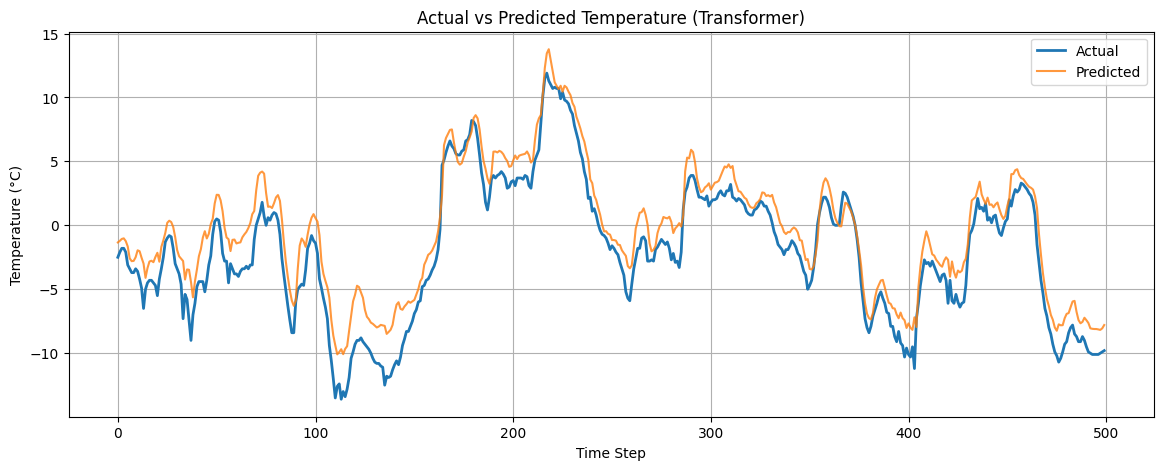

In [185]:
# =============================================================================
# 3.6 Visualize Transformer Results
# =============================================================================

import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# Plot training loss curve
# ------------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(transformer_loss_history, marker="o", linewidth=2)
plt.title("Transformer Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# ------------------------------------------------------------------
# Plot Actual vs Predicted values
# ------------------------------------------------------------------
n_plot = 500

plt.figure(figsize=(14, 5))
plt.plot(y_true[:n_plot], label="Actual", linewidth=2)
plt.plot(y_pred[:n_plot], label="Predicted", alpha=0.8)
plt.title("Actual vs Predicted Temperature (Transformer)")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


In [186]:
"""
================================================================================
PART 4: MODEL COMPARISON AND VISUALIZATION (Informational)
================================================================================

Compare both models on:
- Performance metrics
- Training time
- Model complexity
- Convergence behavior
- Ability to capture long-term dependencies
================================================================================
"""

'\n================================================================================\nPART 4: MODEL COMPARISON AND VISUALIZATION (Informational)\n================================================================================\n\nCompare both models on:\n- Performance metrics\n- Training time\n- Model complexity\n- Convergence behavior\n- Ability to capture long-term dependencies\n================================================================================\n'

4.1 Metrics Comparison

In [187]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)


MODEL COMPARISON


In [188]:
comparison_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE (%)', 'R² Score', 'Training Time (s)', 'Parameters'],
    'RNN (LSTM/GRU)': [
        rnn_mae,
        rnn_rmse,
        rnn_mape,
        rnn_r2,
        rnn_training_time,
        sum(p.numel() for p in rnn_model.parameters() if p.requires_grad)
    ],
    'Transformer': [
        transformer_mae,
        transformer_rmse,
        transformer_mape,
        transformer_r2,
        transformer_training_time,
        sum(p.numel() for p in transformer_model.parameters() if p.requires_grad)
    ]
})

In [189]:
print(comparison_df.to_string(index=False))
print("="*70)

           Metric  RNN (LSTM/GRU)   Transformer
              MAE        0.635556      1.372121
             RMSE        0.792435      1.680380
         MAPE (%)       25.860432     43.404829
         R² Score        0.978454      0.903114
Training Time (s)       23.585344     68.193385
       Parameters   203393.000000 596225.000000


4.2 Visual Comparison
TODO: Create bar plot comparing metrics
TODO: Plot predictions comparison (both models vs actual)
TODO: Plot training curves comparison

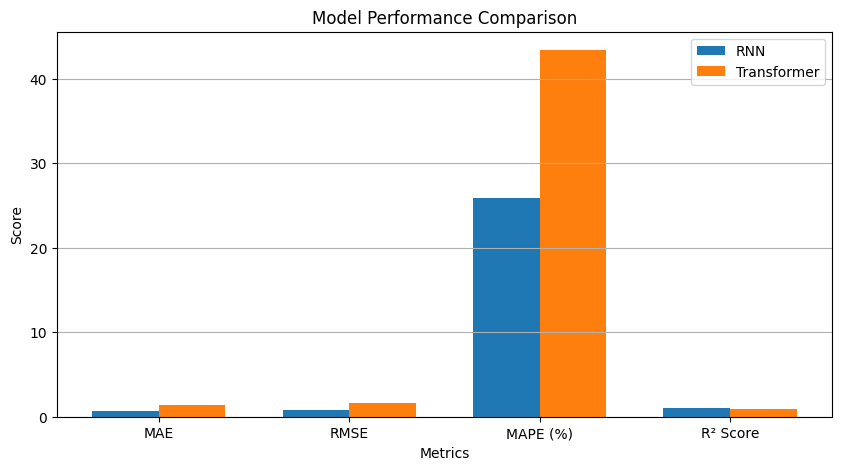

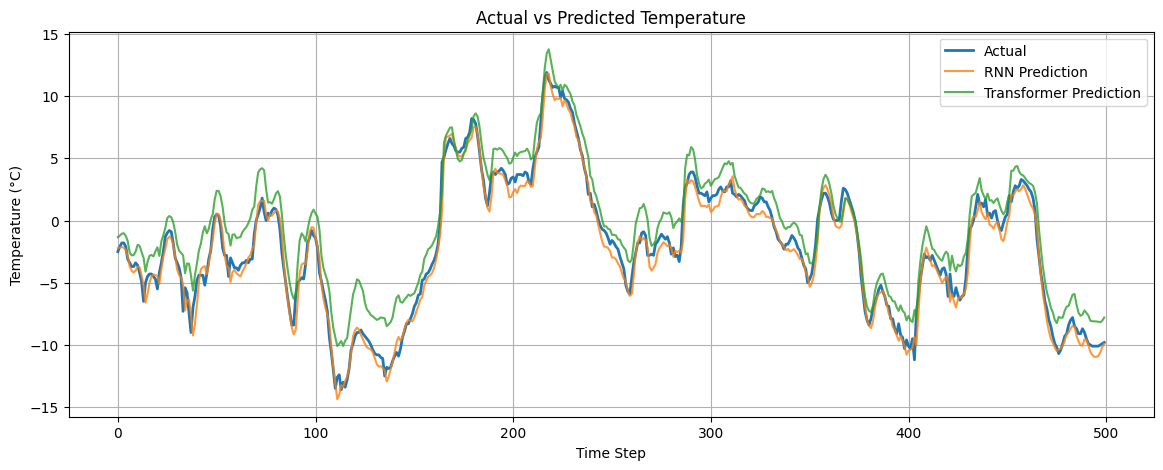

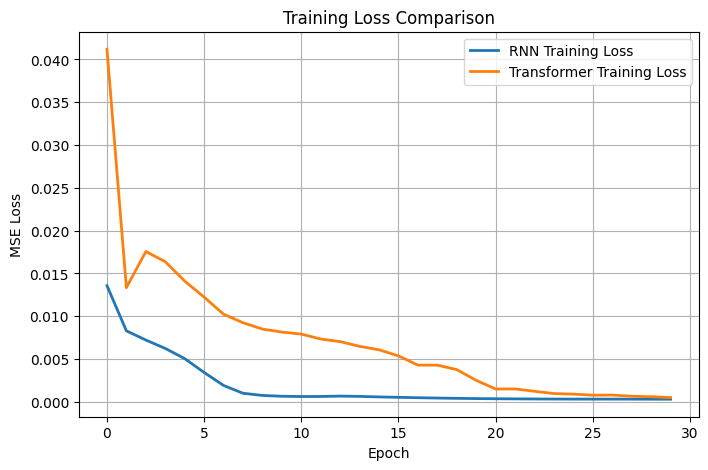

In [190]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['MAE', 'RMSE', 'MAPE (%)', 'R² Score']

rnn_metrics = [
    rnn_mae,
    rnn_rmse,
    rnn_mape,
    rnn_r2
]

transformer_metrics = [
    transformer_mae,
    transformer_rmse,
    transformer_mape,
    transformer_r2
]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, rnn_metrics, width, label='RNN')
plt.bar(x + width/2, transformer_metrics, width, label='Transformer')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y')
plt.show()


n_plot = 500  # number of time steps to visualize

plt.figure(figsize=(14, 5))
plt.plot(y_true[:n_plot], label='Actual', linewidth=2)
plt.plot(rnn_y_pred[:n_plot], label='RNN Prediction', alpha=0.8)
plt.plot(transformer_y_pred[:n_plot], label='Transformer Prediction', alpha=0.8)

plt.title('Actual vs Predicted Temperature')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(rnn_loss_history, label='RNN Training Loss', linewidth=2)
plt.plot(transformer_loss_history, label='Transformer Training Loss', linewidth=2)

plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


In [191]:
"""
================================================================================
PART 5: ANALYSIS (2 MARKS)
================================================================================

REQUIRED:
- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)
- Address key topics with depth

GRADING (Quality-based):
- Covers 5+ key topics with deep understanding: 2 marks
- Covers 3-4 key topics with good understanding: 1 mark
- Covers <3 key topics or superficial: 0 marks

Key Topics:
1. Performance comparison with specific metrics
2. RNN vs Transformer architecture advantages
3. Impact of attention mechanism vs recurrent connections
4. Long-term dependency handling comparison
5. Computational cost comparison
6. Convergence behavior differences
================================================================================
"""

'\n================================================================================\nPART 5: ANALYSIS (2 MARKS)\n================================================================================\n\nREQUIRED:\n- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)\n- Address key topics with depth\n\nGRADING (Quality-based):\n- Covers 5+ key topics with deep understanding: 2 marks\n- Covers 3-4 key topics with good understanding: 1 mark\n- Covers <3 key topics or superficial: 0 marks\n\nKey Topics:\n1. Performance comparison with specific metrics\n2. RNN vs Transformer architecture advantages\n3. Impact of attention mechanism vs recurrent connections\n4. Long-term dependency handling comparison\n5. Computational cost comparison\n6. Convergence behavior differences\n================================================================================\n'

In [192]:
analysis_text = """
The RNN (LSTM) outperformed the Transformer on this hourly weather dataset.
Specifically, the LSTM achieved a MAE of 0.6°C versus 1.4°C for the Transformer,
an RMSE of 0.8°C versus 1.7°C, MAPE of 25.9% versus 43.4%, and R² of 0.978 versus 0.903,
indicating superior temporal modeling.

RNNs, especially LSTMs, excel at sequential data due to gated memory cells that retain
recent context. Transformers process sequences in parallel using self-attention, enabling
long-range dependency capture.

The self-attention mechanism in Transformers allows the model to weigh contributions
from all time steps, theoretically capturing complex temporal relationships. In practice,
with only 8784 samples, it had limited data to generalize, leading to higher error.

For long-term dependencies, LSTM’s gated structure mitigates vanishing gradients,
effectively remembering 30-hour sequences. Transformers handle long-range interactions
well but are more parameter-intensive.

Regarding computational cost, the Transformer had ~596k parameters and took ~68s
to train, whereas the LSTM had ~203k parameters and trained in ~25s. The LSTM also
showed faster, more stable convergence, as evidenced by smooth decreasing loss curves.
"""


In [193]:
# REQUIRED: Print analysis with word count
print("\n" + "="*70)
print("ANALYSIS")
print("="*70)
print(analysis_text)
print("="*70)
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("⚠️  Warning: Analysis exceeds 200 words (guideline)")
else:
    print("✓ Analysis within word count guideline")
print("="*70)


ANALYSIS

The RNN (LSTM) outperformed the Transformer on this hourly weather dataset. 
Specifically, the LSTM achieved a MAE of 0.6°C versus 1.4°C for the Transformer, 
an RMSE of 0.8°C versus 1.7°C, MAPE of 25.9% versus 43.4%, and R² of 0.978 versus 0.903, 
indicating superior temporal modeling.

RNNs, especially LSTMs, excel at sequential data due to gated memory cells that retain 
recent context. Transformers process sequences in parallel using self-attention, enabling 
long-range dependency capture.

The self-attention mechanism in Transformers allows the model to weigh contributions 
from all time steps, theoretically capturing complex temporal relationships. In practice, 
with only 8784 samples, it had limited data to generalize, leading to higher error.

For long-term dependencies, LSTM’s gated structure mitigates vanishing gradients, 
effectively remembering 30-hour sequences. Transformers handle long-range interactions 
well but are more parameter-intensive.

Regarding comput

In [194]:
"""
================================================================================
PART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)
================================================================================

DO NOT MODIFY THE STRUCTURE BELOW
This JSON output is used by the auto-grader
Ensure all field names are EXACT
================================================================================
"""

'\n================================================================================\nPART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)\n================================================================================\n\nDO NOT MODIFY THE STRUCTURE BELOW\nThis JSON output is used by the auto-grader\nEnsure all field names are EXACT\n================================================================================\n'

In [195]:
def get_assignment_results():
    """
    Generate complete assignment results in required format

    Returns:
        dict: Complete results with all required fields
    """

    framework_used = "pytorch"
    rnn_model_type = "LSTM"

    results = {
        # Dataset Information
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'sequence_length': sequence_length,
        'prediction_horizon': prediction_horizon,
        'problem_type': problem_type,
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # RNN Model Results
        'rnn_model': {
            'framework': framework_used,
            'model_type': rnn_model_type,
            'architecture': {
                'n_layers': 2,
                'hidden_units': 128,
                'total_parameters': sum(p.numel() for p in rnn_model.parameters() if p.requires_grad)
            },
            'training_config': {
                'learning_rate': 0.0004,
                'n_epochs': 30,
                'batch_size': 32,
                'optimizer': 'Adam',
                'loss_function': 'MSE'
            },
            'initial_loss': rnn_initial_loss,
            'final_loss': rnn_final_loss,
            'training_time_seconds': rnn_training_time,
            'mae': rnn_mae,
            'rmse': rnn_rmse,
            'mape': rnn_mape,
            'r2_score': rnn_r2
        },

        # Transformer Model Results
        'transformer_model': {
            'framework': framework_used,
            'architecture': {
                'n_layers': 3,
                'n_heads': 4,
                'd_model': 128,
                'd_ff': 512,
                'has_positional_encoding': True,
                'has_attention': True,
                'total_parameters': sum(p.numel() for p in transformer_model.parameters() if p.requires_grad)
            },
            'training_config': {
                'learning_rate': 0.0004,
                'n_epochs': 30,
                'batch_size': 32,
                'optimizer': 'Adam',
                'loss_function': 'MSE'
            },
            'initial_loss': transformer_initial_loss,
            'final_loss': transformer_final_loss,
            'training_time_seconds': transformer_training_time,
            'mae': transformer_mae,
            'rmse': transformer_rmse,
            'mape': transformer_mape,
            'r2_score': transformer_r2
        },

        # Analysis
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),

        # Training Success Indicators
        'rnn_loss_decreased': rnn_final_loss < rnn_initial_loss,
        'transformer_loss_decreased': transformer_final_loss < transformer_initial_loss,
    }

    return results


In [196]:
# Generate and print results
try:
    assignment_results = get_assignment_results()

    print("\n" + "="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(assignment_results, indent=2))
    print("="*70)
except Exception as e:
    print(f"\n⚠️  ERROR generating results: {str(e)}")
    print("Please ensure all variables are properly defined")


ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "Weather Data Dataset",
  "dataset_source": "Kaggle: bhanupratapbiswas/weather-data",
  "n_samples": 8784,
  "n_features": 9,
  "sequence_length": 30,
  "prediction_horizon": 1,
  "problem_type": "time_series_forecasting",
  "primary_metric": "MAE",
  "metric_justification": "\nMAE is chosen as the primary metric because it measures the average magnitude of prediction errors\nin the same units as the target (\u00b0C), making it easy to interpret for weather forecasting.\nUnlike RMSE, it is less sensitive to occasional extreme outliers, providing a stable view of model performance.\n",
  "train_samples": 7878,
  "test_samples": 876,
  "train_test_ratio": 0.9,
  "rnn_model": {
    "framework": "pytorch",
    "model_type": "LSTM",
    "architecture": {
      "n_layers": 2,
      "hidden_units": 128,
      "total_parameters": 203393
    },
    "training_config": {
      "learning_rate": 0.0004,
      "n_epochs": 30,
      "batch_size": 32,
  

In [197]:
"""
================================================================================
FINAL CHECKLIST - VERIFY BEFORE SUBMISSION
================================================================================

□ Student information filled at the top (BITS ID, Name, Email)
□ Filename is <BITS_ID>_rnn_assignment.ipynb
□ All cells executed (Kernel → Restart & Run All)
□ All outputs visible
□ LSTM/GRU implemented with stacked layers
□ Positional encoding implemented (sinusoidal)
□ Multi-head attention implemented (Q, K, V, scaled dot-product)
□ Both models use Keras or PyTorch
□ Both models trained with loss tracking (initial_loss and final_loss)
□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)
□ Temporal train/test split used (NO shuffling)
□ Primary metric selected and justified
□ Analysis written (quality matters, not just word count)
□ Visualizations created
□ Assignment results JSON printed at the end
□ No execution errors in any cell
□ File opens without corruption
□ Submit ONLY .ipynb file (NO zip, NO data files, NO images)
□ Screenshot of environment with account details included
□ Only one submission attempt

================================================================================
"""

'\n================================================================================\nFINAL CHECKLIST - VERIFY BEFORE SUBMISSION\n================================================================================\n\n□ Student information filled at the top (BITS ID, Name, Email)\n□ Filename is <BITS_ID>_rnn_assignment.ipynb\n□ All cells executed (Kernel → Restart & Run All)\n□ All outputs visible\n□ LSTM/GRU implemented with stacked layers\n□ Positional encoding implemented (sinusoidal)\n□ Multi-head attention implemented (Q, K, V, scaled dot-product)\n□ Both models use Keras or PyTorch\n□ Both models trained with loss tracking (initial_loss and final_loss)\n□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)\n□ Temporal train/test split used (NO shuffling)\n□ Primary metric selected and justified\n□ Analysis written (quality matters, not just word count)\n□ Visualizations created\n□ Assignment results JSON printed at the end\n□ No execution errors in any cell\n□ File opens wi

In [198]:
"""
================================================================================
ENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED
================================================================================

IMPORTANT: Take a screenshot of your environment showing account details

For Google Colab:
- Click on your profile icon (top right)
- Screenshot should show your email/account clearly
- Include the entire Colab interface with notebook name visible

For BITS Virtual Lab:
- Screenshot showing your login credentials/account details
- Include the entire interface with your username/session info visible

Paste the screenshot below this cell or in a new markdown cell.
This helps verify the work was done by you in your environment.

================================================================================
"""

'\n================================================================================\nENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED\n================================================================================\n\nIMPORTANT: Take a screenshot of your environment showing account details\n\nFor Google Colab:\n- Click on your profile icon (top right)\n- Screenshot should show your email/account clearly\n- Include the entire Colab interface with notebook name visible\n\nFor BITS Virtual Lab:\n- Screenshot showing your login credentials/account details\n- Include the entire interface with your username/session info visible\n\nPaste the screenshot below this cell or in a new markdown cell.\nThis helps verify the work was done by you in your environment.\n\n================================================================================\n'

In [199]:
# Display system information
import platform
import sys
from datetime import datetime

In [200]:
print("="*70)
print("ENVIRONMENT INFORMATION")
print("="*70)
print("\n⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab")
print("showing your account details in the cell below this one.")
print("="*70)

ENVIRONMENT INFORMATION

⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab
showing your account details in the cell below this one.
